<h1>CNN on MNIST Hand written digit dataset</h1>

* Has 60,000 training images
* Has 10,000 test images
* Shape of each image = (28,28)
* Shape of entire training data = (60000,28,28,1)
                                  (samples, width, height, channels)

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data

In [4]:
import tensorflow as tf

In [8]:
from tensorflow.keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print("Shape of the training data: ", X_train.shape)
print("Shape of the testing data: ", X_test.shape)

Shape of the training data:  (60000, 28, 28)
Shape of the testing data:  (10000, 28, 28)


In [12]:
single_image = X_train[0]
print("Shape of single image: ",single_image.shape)

Shape of single image:  (28, 28)


The labelled digit of the below plot:  5 



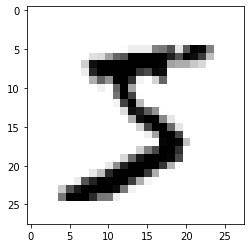

In [21]:
plt.imshow(single_image, cmap='binary')
print("The labelled digit of the below plot: ", y_train[0],"\n")

Pre-processing:- One Hot Encoding & reshaping the data

In [29]:
# One Hot Encoding 

from tensorflow.keras.utils import to_categorical       # converts to binary class matrix
print("Shape before encoding: ", y_train.shape)
y_example = to_categorical(y_train)
print("Shape after encoding: ", y_example.shape)

Shape before encoding:  (60000,)
Shape after encoding:  (60000, 10)


In [30]:
print("Label before encoding: ",y_train[0])
print("Label after encoding: ", y_example[0])

Label before encoding:  5
Label after encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [31]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [33]:
# Normalizse the data

print("Maximum pixel value in an image: ", single_image.max())
print("Minimum pixel value in an image: ", single_image.min())

Maximum pixel value in an image:  255
Minimum pixel value in an image:  0


In [34]:
X_train = X_train / 255
X_test = X_test / 255

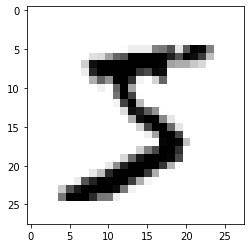

In [37]:
plt.imshow(X_train[0], cmap='binary')       # the image will still be the same even after scaling the values

In [43]:
# Reshaping the data

X_train.shape

(60000, 28, 28)

In [44]:
# but we need to add one more dimension to let the network know that we're dealing with single RGB channel(gray_scale)
# (samples, width, height, color channel)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

Creating the model

* Generally, filters are choosen based off the powers of 2 like 2,4,8,16,32,64,128 ..
* For complex image classification, we need to add more filters
* To start off, 32 is a good number of filters to start with
      kernel_size ----> the size of the filter, (4,4) is good to start with 
      strides     ----> the number of steps taken to slide, default is (1,1)
      padding     ----> has 2 values - 'valid' or 'same'
* valid - don't apply any padding, assumes that all dimensions are valid, so that image fully gets covered by filter.
* same - apply padding to input, so that the input image gets fully covered by the filter.
* Here, 28/4 = 7. If any decimal places were returned like 7.1 then we use the value 'same' for padding if it's divisible then 'valid'

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1),padding='valid',input_shape=(28,28,1),activation='relu'))

# max-pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# flatten layer before Fully connected layer
model.add(Flatten())

# fully connected layer
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [46]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [66]:
# Early Stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [67]:
# Training

model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), callbacks=[early_stop], epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0467 - val_accuracy: 0.9878
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0487 - val_accuracy: 0.9881


Model evaluation

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

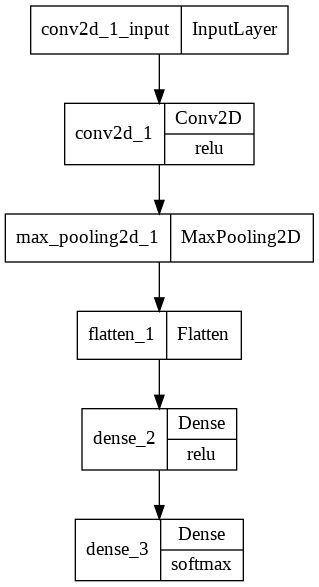

In [63]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=False)

In [68]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.006314,0.997667,0.046725,0.9878
1,0.004841,0.998500,0.048698,0.9881


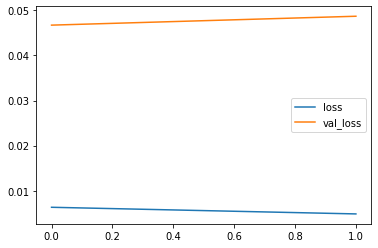

In [69]:
metrics[['loss','val_loss']].plot()

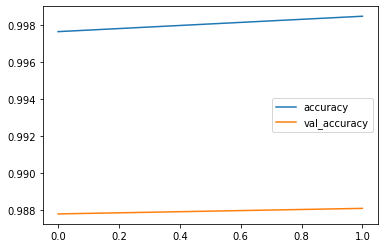

In [70]:
metrics[['accuracy','val_accuracy']].plot()

In [71]:
model.metrics_names

['loss', 'accuracy']

In [73]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.04869795963168144, 0.988099992275238]

In [79]:
# prediction
pred = model.predict(X_test)
pred_classes = [np.argmax(element) for element in pred]

In [81]:
pred_classes[:5]

[7, 2, 1, 0, 4]

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_classes))
print(confusion_matrix(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    0    0    1]
 [   1 1131    0    0    0    0    2    0    1    0]
 [   1    2 1021    0    1    0    1    5    1    0]
 [   0    1    2 1001    0    2    0    2    1    1]
 [   1    0    0    0  971   

Using CNN, we achieve 99% accuracy

In [84]:
from tensorflow.keras.models import load_model
model.save('MNIST_CNN.h5')